# ***GEREKLİ KÜTÜPHANELERİ VE VERİ SETİNİN SAYFAYA DAHİL EDİLMESİ***

In [1]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
import time
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
dfC = pd.read_excel("California House Price.xlsx")

## ***SENARYO 1 : EKSİK VERİ SİLİNECEK / STANDARDİZASYON YAPILMAYACAK / AYKIRI GÖZLEM ANALİZİ YAPILMAYACAK***

In [9]:
df = dfC.copy()

In [ ]:
df.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126        83252.0        NEAR BAY              452600  
1        2401        1138        83014.0        NEAR BAY              358500  
2         496         177        72574.0        NEAR BAY              352100

In [ ]:
df.tail(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_proximity  \
20637        1007         433        45474.0          INLAND   
20638         741         349        18672.0          INLAND   
20639        1387         530        23886.0          INLAND   

       median_house_value  
20637               92300  
20638               84700  
20639               89400

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [ ]:
df.shape

(20433, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [ ]:
df.describe().T

count           mean            std         min  \
longitude           20433.0    -119.570689       2.003578   -124.3500   
latitude            20433.0      35.633221       2.136348     32.5400   
housing_median_age  20433.0      28.633094      12.591805      1.0000   
total_rooms         20433.0    2636.504233    2185.269567      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20433.0    1424.946949    1133.208490      3.0000   
households          20433.0     499.433465     382.299226      1.0000   
median_income       20433.0   34999.253211   21113.829219      0.4999   
median_house_value  20433.0  206864.413155  115435.667099  14999.0000   

                          25%        50%        75%        max  
longitude             -121.80    -118.49    -118.01    -114.31  
latitude                33.93      34.26      37.72      41.95  
housing_median_age      18.00      29.00      37.00      52.00  
total_rooms           1450.00    2127.00    3143.00   39320.00  
total_bedrooms         296.00     435.00     647.00    6445.00  
population             787.00    1166.00    1722.00   35682.00  
households             280.00     409.00     604.00    6082.00  
median_income        21866.00   32969.00   45554.00  150001.00  
median_house_value  119500.00  179700.00  264700.00  500001.00

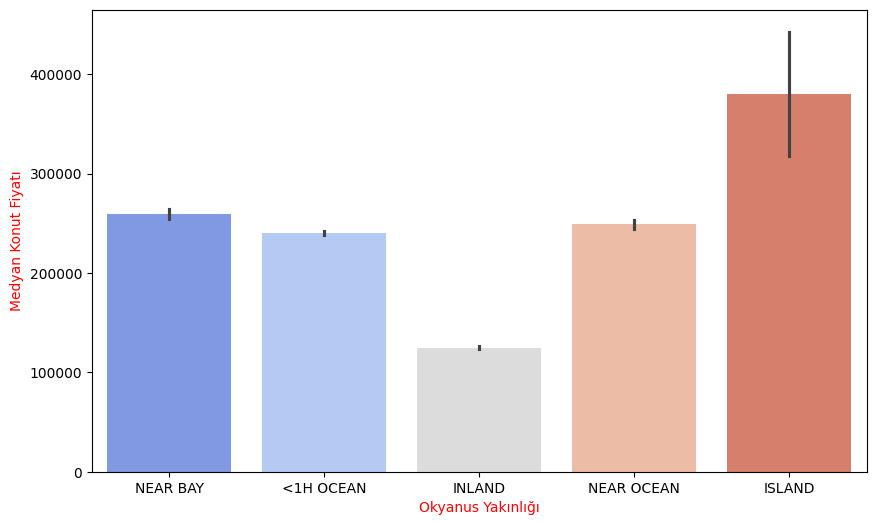

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='ocean_proximity', y='median_house_value', data=df, palette='coolwarm')
plt.xlabel("Okyanus Yakınlığı", color = "red")
plt.ylabel("Medyan Konut Fiyatı", color = "red")
plt.show()

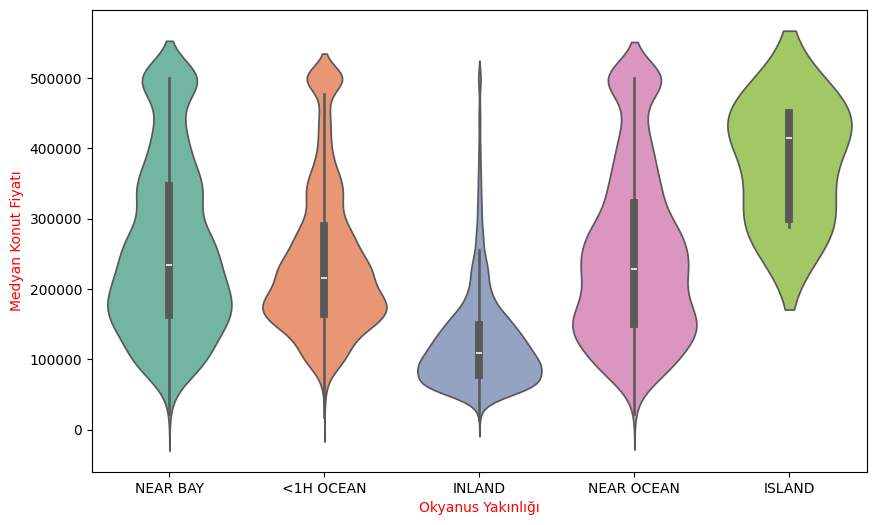

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ocean_proximity', y='median_house_value', data=df, palette="Set2")
plt.xlabel("Okyanus Yakınlığı", color = "red")
plt.ylabel("Medyan Konut Fiyatı", color = "red")
plt.show()

In [ ]:
correlation = df.select_dtypes(include=[float, int])

In [ ]:
corr = correlation.corr()

In [ ]:
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_house_value  
longitude                 0.069608    0.100270    0.056513           -0.045398  
latitude                 -0.066983   -0.108997   -0.071774           -0.144638  
housing_median_age       -0.320451   -0.295787   -0.302768            0.

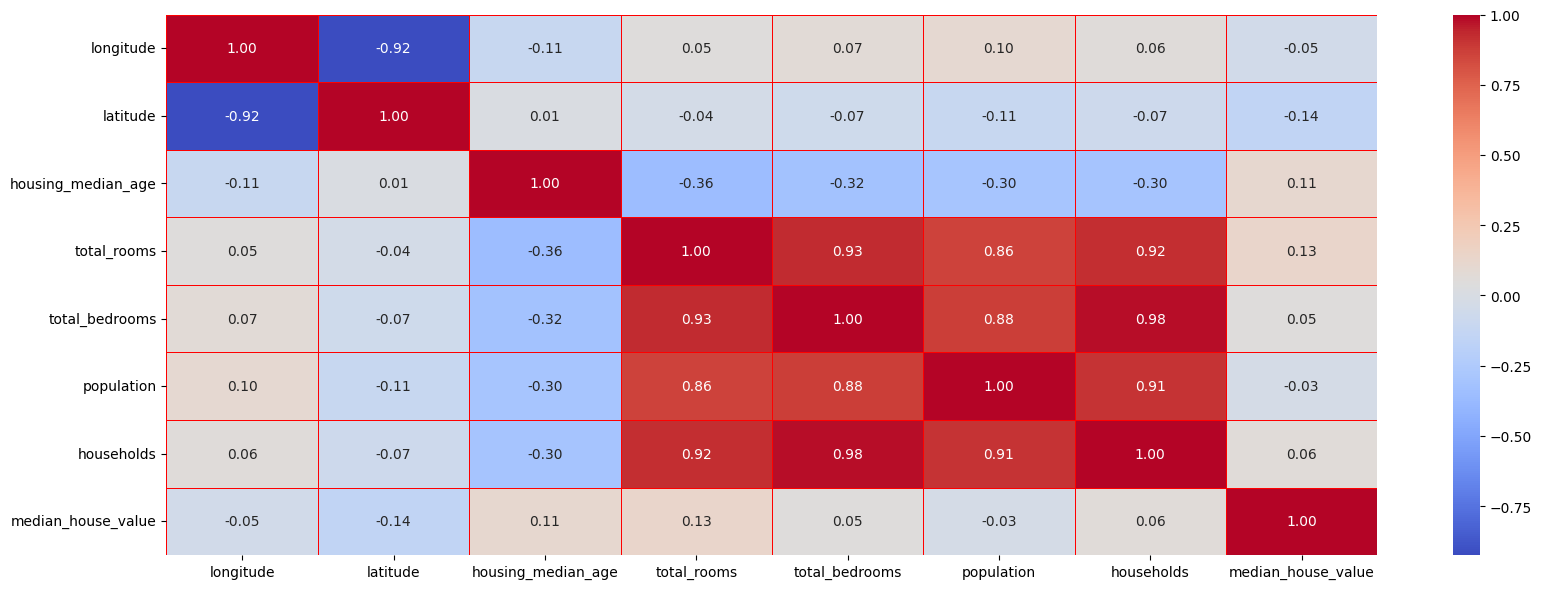

In [ ]:
plt.figure(figsize=(17,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="red")
plt.tight_layout()
plt.show()

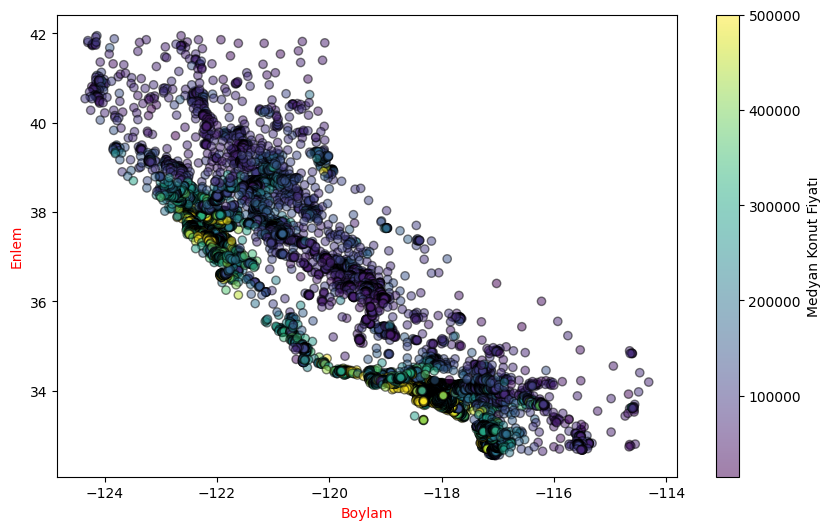

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', marker='o', edgecolor='k', alpha=0.5)
plt.colorbar(label='Medyan Konut Fiyatı')
plt.xlabel('Boylam', color = "red")
plt.ylabel('Enlem', color = "red")
plt.show()

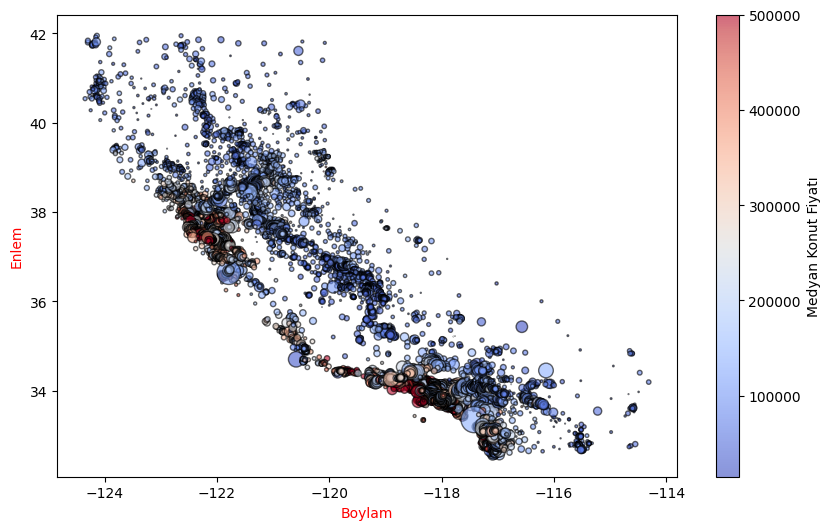

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], s=df['population']/100, c=df['median_house_value'], cmap='coolwarm', marker='o', edgecolor='k', alpha=0.6)
plt.colorbar(label='Medyan Konut Fiyatı')
plt.xlabel('Boylam', color = "red")
plt.ylabel('Enlem', color = "red")
plt.show()                                       #nüfusa göre medyan konut fiyatı

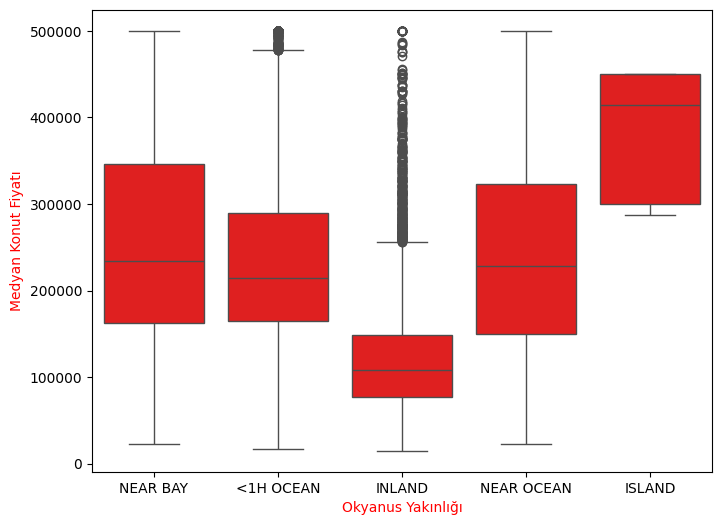

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, color = "red")
plt.xlabel("Okyanus Yakınlığı", color = "red")
plt.ylabel("Medyan Konut Fiyatı", color = "red")
plt.show()

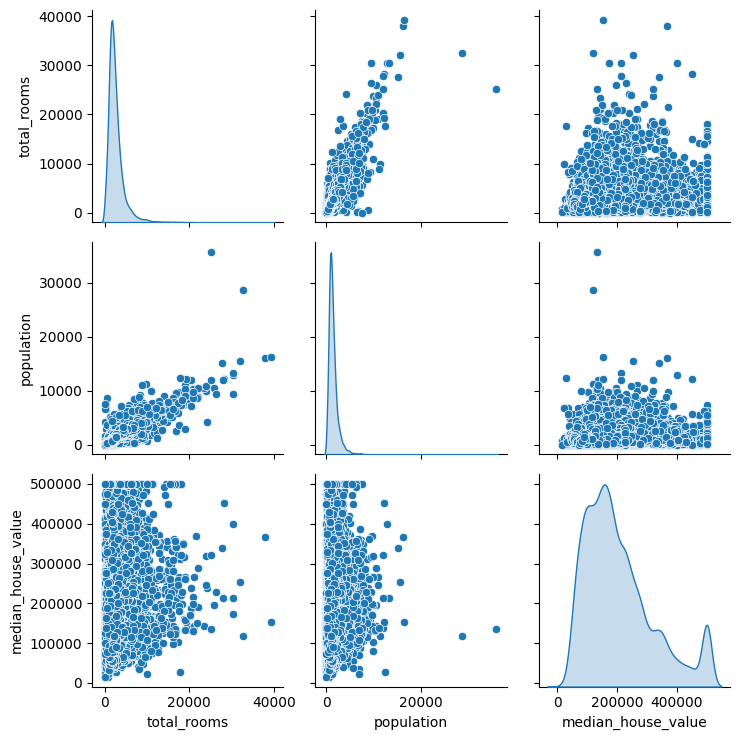

In [ ]:
sns.pairplot(df[['median_income', 'total_rooms', 'population', 'median_house_value']], diag_kind='kde', palette='coolwarm')
plt.tight_layout()
plt.show()                #daha önemli değişkenler ile subset oluşturuldu

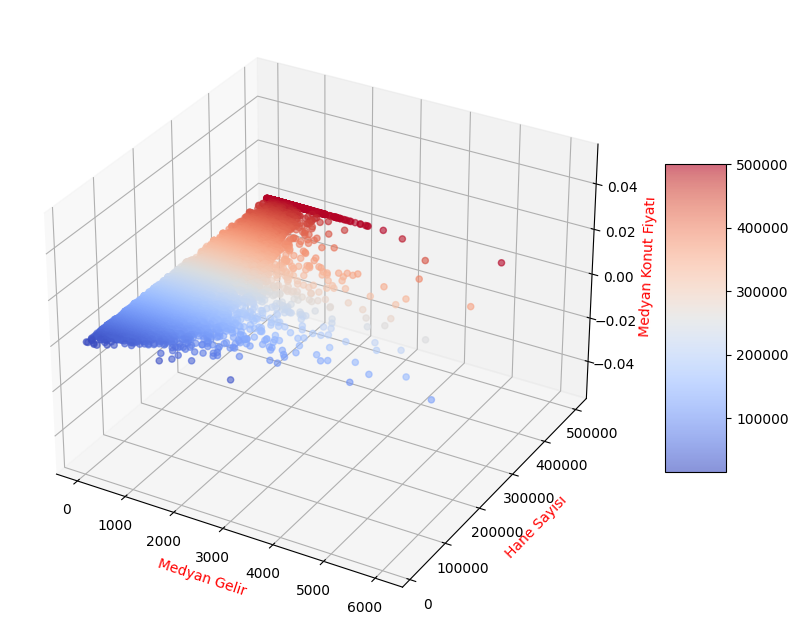

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['households'], df['median_house_value'], c=df['median_house_value'], cmap='coolwarm', alpha=0.6)
ax.set_xlabel('Medyan Gelir', color = "red")
ax.set_ylabel('Hane Sayısı', color = "red")
ax.set_zlabel('Medyan Konut Fiyatı', color = "red")
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
plt.show()                                     #hane sayısı ve konut fiyatı

In [13]:
y = df[["median_house_value"]]
x = df.drop(["median_house_value", "ocean_proximity"], axis = 1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 42, train_size=0.70)

Train Time: 0.18142104148864746
Train MSE: 6519106842.520754
Train MAE: 60914.89481021122
Train MAPE: 0.37770628660176186
Train R2: 0.5106327031104156
---------------------------------------------
Test Time: 0.008114099502563477
Test MSE: 6377963095.779033
Test MAE: 60846.50896618835
Test MAPE: 0.38050254357081337
Test R2: 0.5215666176661209
-----------------------------------------------
Best parameters: {'fit_intercept': True}


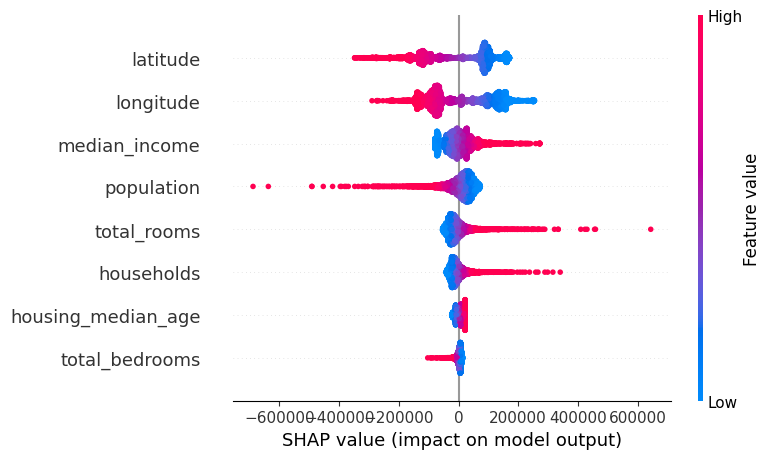

In [ ]:
param_grid = {
    'fit_intercept': [True, False]
}
                                                                                              #Senaryo 1 : Linear Regression
lr = LinearRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)
start_train_time = time.time()
grid_search.fit(x_train, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_linear = grid_search.best_estimator_

y_train_pred = best_linear.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train,y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_linear.predict(x_test)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print("---------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")
print("-----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

explainer = shap.Explainer(best_linear, x_train)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)

Train Time : 11.087828159332275
Train MSE : 4123424784.977899
Train MAE : 45390.293797238024
Train MAPE : 0.2694760618026782
Train R2 : 0.690468450710052
-----------------------------------
Test Time : 0.003017425537109375
Test MSE : 4940525136.429561
Test MAE : 49199.287789637
Test MAPE : 0.2904798429058543
Test R2 : 0.6293938807686328
-------------------------------------
Best Parametre : {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 3}


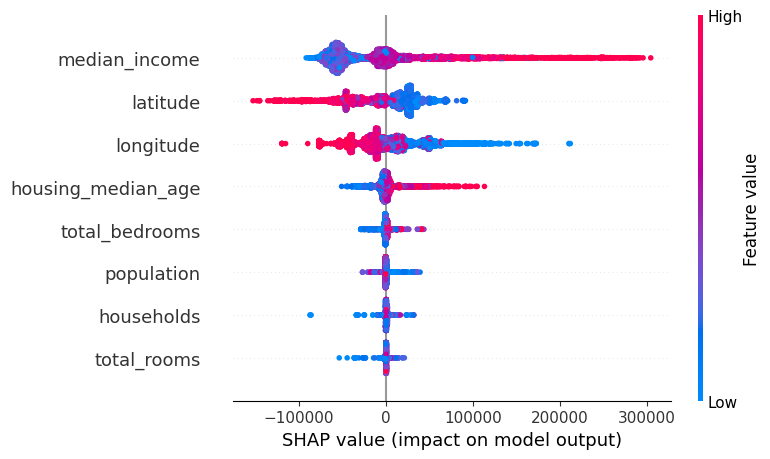

In [ ]:
param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [3, 5, 8],
    'min_samples_leaf': [3, 5, 8]
}
                                                                                                      #Senaryo 1 : Decision Tree Regression
dc = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dc, param_grid = param_grid, cv= 5, n_jobs= -1)
start_train_time = time.time()
grid_search.fit(x_train, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_decision = grid_search.best_estimator_

y_train_pred = best_decision.predict(x_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_decision.predict(x_test)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time : {total_train_time}")
print(f"Train MSE : {train_mse}")
print(f"Train MAE : {train_mae}")
print(f"Train MAPE : {train_mape}")
print(f"Train R2 : {train_r2}")
print("-----------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test MSE : {test_mse}")
print(f"Test MAE : {test_mae}")
print(f"Test MAPE : {test_mape}")
print(f"Test R2 : {test_r2}")
print("-------------------------------------")
print(f"Best Parametre : {grid_search.best_params_}")


explainer = shap.TreeExplainer(best_decision)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)

Train Time : 126.3874180316925
Train MSE : 2600592317.4778347
Train MAE : 35905.6657018332
Train MAPE : 0.21220936494965428
Train R2 : 0.8047823323871385
-------------------------------------------
Test Time : 0.031183719635009766
Test MSE : 3461381740.873875
Test MAE : 40538.55418185775
Test MAPE : 0.23670605529994224
Test R2 : 0.7403496149215736
---------------------------------------------
Best Parametre : {'max_depth': 9, 'min_samples_split': 7, 'n_estimators': 50}


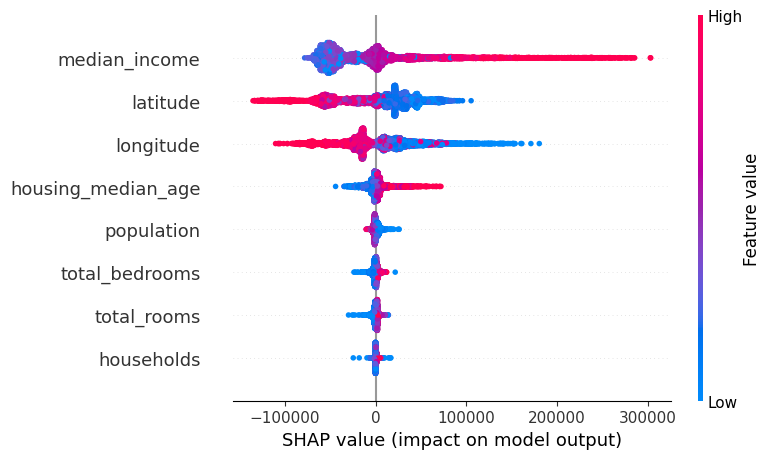

In [ ]:
param_grid = {
    'n_estimators' : [20, 50],
    'max_depth' : [4, 7, 9],
    'min_samples_split' : [5, 7, 10]
}                                                                                                   #Senaryo 1 : Random Forest Regressor

rm = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rm, param_grid=param_grid, cv = 5, n_jobs=-1)
start_train_time = time.time()
grid_search.fit(x_train, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_random = grid_search.best_estimator_

y_train_pred = best_random.predict(x_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_random.predict(x_test)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time : {total_train_time}")
print(f"Train MSE : {train_mse}")
print(f"Train MAE : {train_mae}")
print(f"Train MAPE : {train_mape}")
print(f"Train R2 : {train_r2}")
print("-------------------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test MSE : {test_mse}")
print(f"Test MAE : {test_mae}")
print(f"Test MAPE : {test_mape}")
print(f"Test R2 : {test_r2}")
print("---------------------------------------------")
print(f"Best Parametre : {grid_search.best_params_}")

explainer = shap.Explainer(best_random)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)

# **SENARYO 2 : EKSİK VERİ SİLİNECEK / STANDARDİZASYON YAPILACAK / AYKIRI GÖZLEM ANALİZİ YAPILMAYACAK**

In [15]:
df1 = dfC.copy()

In [16]:
y = df1[["median_house_value"]]
x = df1.drop(["median_house_value", "ocean_proximity"], axis = 1)

In [17]:
standart = StandardScaler()

In [18]:
x_train_scaler = standart.fit_transform(x_train)
x_test_scaler = standart.transform(x_test)

Train Time: 0.13692927360534668
Train MSE: 6519106842.520754
Train MAE: 60914.89481021331
Train MAPE: 0.3777062866018153
Train R2: 0.5106327031104156
---------------------------------------------
Test Time: 0.0006017684936523438
Test MSE: 6377963095.778995
Test MAE: 60846.50896619118
Test MAPE: 0.3805025435708718
Test R2: 0.5215666176661238
-----------------------------------------------
Best parameters: {'fit_intercept': True}


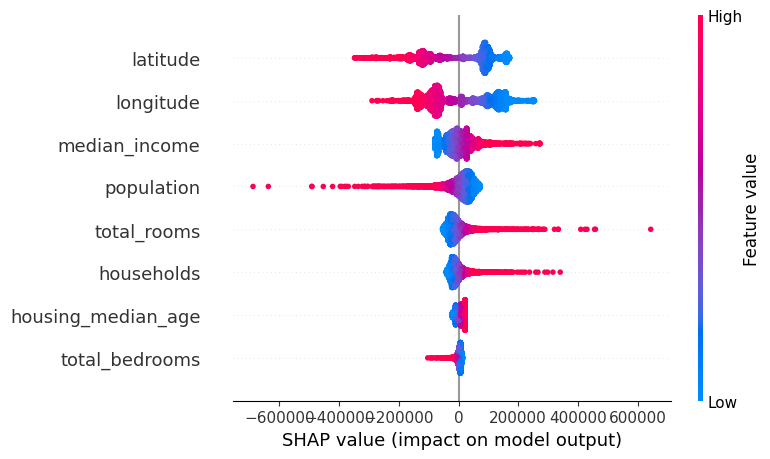

In [ ]:
param_grid = {
    'fit_intercept': [True, False]
}
                                                                                              #Senaryo 2 : Linear Regression
lr = LinearRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)
start_train_time = time.time()
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_linear = grid_search.best_estimator_

y_train_pred = best_linear.predict(x_train_scaler)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train,y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_linear.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print("---------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")
print("-----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

explainer = shap.LinearExplainer(best_linear, x_train_scaler)
shap_values = explainer(x_test_scaler)
shap.summary_plot(shap_values, x_test_scaler, feature_names=x_test.columns)

Train Time : 8.29474925994873
Train MSE : 4123424784.977899
Train MAE : 45390.293797238024
Train MAPE : 0.2694760618026782
Train R2 : 0.690468450710052
-----------------------------------
Test Time : 0.0011439323425292969
Test MSE : 4936017775.853934
Test MAE : 49196.22117190997
Test MAPE : 0.29049965660240373
Test R2 : 0.6297319936948462
-------------------------------------
Best Parametre : {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 3}


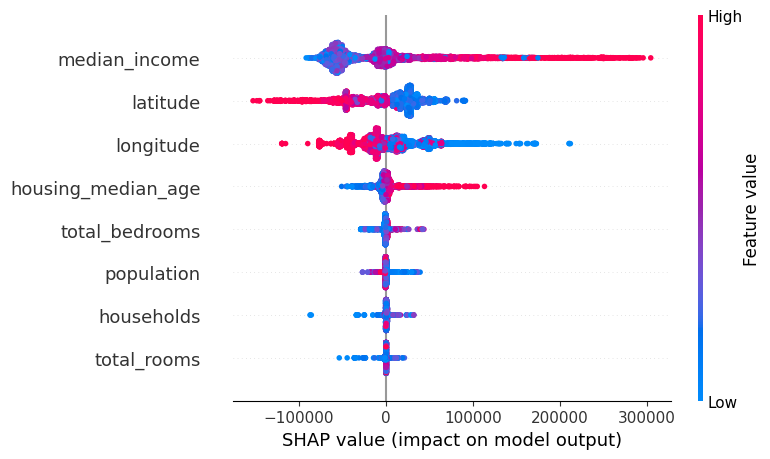

In [ ]:
param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [3, 5, 8],
    'min_samples_leaf': [3, 5, 8]
}
                                                                                                      #Senaryo 2 : Decision Tree Regression
dc = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dc, param_grid = param_grid, cv= 5, n_jobs= -1)
start_train_time = time.time()
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_decision = grid_search.best_estimator_

y_train_pred = best_decision.predict(x_train_scaler)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_decision.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time : {total_train_time}")
print(f"Train MSE : {train_mse}")
print(f"Train MAE : {train_mae}")
print(f"Train MAPE : {train_mape}")
print(f"Train R2 : {train_r2}")
print("-----------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test MSE : {test_mse}")
print(f"Test MAE : {test_mae}")
print(f"Test MAPE : {test_mape}")
print(f"Test R2 : {test_r2}")
print("-------------------------------------")
print(f"Best Parametre : {grid_search.best_params_}")


explainer = shap.TreeExplainer(best_decision)
shap_values = explainer.shap_values(x_test_scaler)
shap.summary_plot(shap_values, x_test_scaler, feature_names=x_test.columns)

Train Time : 132.31910514831543
Train MSE : 2613058190.7579355
Train MAE : 35907.77838038677
Train MAPE : 0.21090449488914184
Train R2 : 0.8038465614513622
-------------------------------------------
Test Time : 0.026948213577270508
Test MSE : 3479188659.249428
Test MAE : 40585.006439587334
Test MAPE : 0.23582586418492937
Test R2 : 0.7390138555169766
---------------------------------------------
Best Parametre : {'max_depth': 9, 'min_samples_split': 7, 'n_estimators': 50}


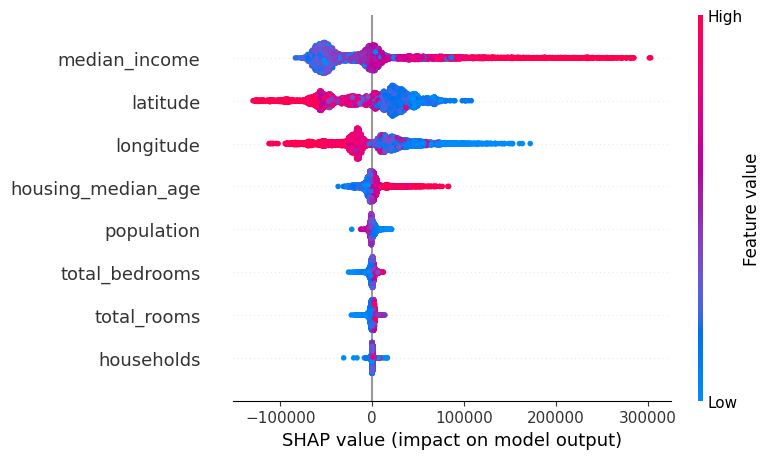

In [ ]:
param_grid = {
    'n_estimators' : [20, 50],
    'max_depth' : [4, 7, 9],
    'min_samples_split' : [5, 7, 10]
}                                                                                                   #Senaryo 2 : Random Forest Regressor

rm = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rm, param_grid=param_grid, cv = 5, n_jobs=-1)
start_train_time = time.time()
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_random = grid_search.best_estimator_

y_train_pred = best_random.predict(x_train_scaler)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_random.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time : {total_train_time}")
print(f"Train MSE : {train_mse}")
print(f"Train MAE : {train_mae}")
print(f"Train MAPE : {train_mape}")
print(f"Train R2 : {train_r2}")
print("-------------------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test MSE : {test_mse}")
print(f"Test MAE : {test_mae}")
print(f"Test MAPE : {test_mape}")
print(f"Test R2 : {test_r2}")
print("---------------------------------------------")
print(f"Best Parametre : {grid_search.best_params_}")

explainer = shap.Explainer(best_random)
shap_values = explainer(x_test_scaler)
shap.summary_plot(shap_values, x_test_scaler, feature_names=x_test.columns)

# **SENARYO 3 : EKSİK VERİ SİLİNECEK / STANDARDİZASYON YAPILACAK / AYKIRI GÖZLEM ANALİZİNİN BASKILAM YÖNTEMİ KULLANILARAK DOLDURULMASI**

In [69]:
df2 = dfC.copy()

In [70]:
df2.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [71]:
df2.dropna(inplace=True)

In [72]:
df2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [74]:
numeric_columns = df2.select_dtypes(include=[np.number])

q1 = numeric_columns.quantile(0.25)
q3 = numeric_columns.quantile(0.75)
IQR = q3 - q1                                                            #aykırı değerleri baskılama yöntemi ile dolduruldu

alt_sinir = q1 - 1.5 * IQR
ust_sinir = q3 + 1.5 * IQR

for column in numeric_columns.columns:
    df2[column] = np.where(df2[column] < alt_sinir[column], alt_sinir[column], df2[column])
    df2[column] = np.where(df2[column] > ust_sinir[column], ust_sinir[column], df2[column])

print("Aykırı değerler baskılama yöntemi ile sınırlandırıldıktan sonra kalan veri seti boyutu: ", df5.shape)

Aykırı değerler baskılama yöntemi ile sınırlandırıldıktan sonra kalan veri seti boyutu:  (20640, 10)


Train Time: 0.13800668716430664
Train MSE: 6112680033.518233
Train MAE: 59992.008361676686
Train MAPE: 0.37249118052414915
Train R2: 0.5233748754100143
---------------------------------------------
Test Time: 0.002378225326538086
Test MSE: 6065519970.401742
Test MAE: 60152.4633850142
Test MAPE: 0.3768028109814587
Test R2: 0.5273435970593634
-----------------------------------------------
Best parameters: {'fit_intercept': True}


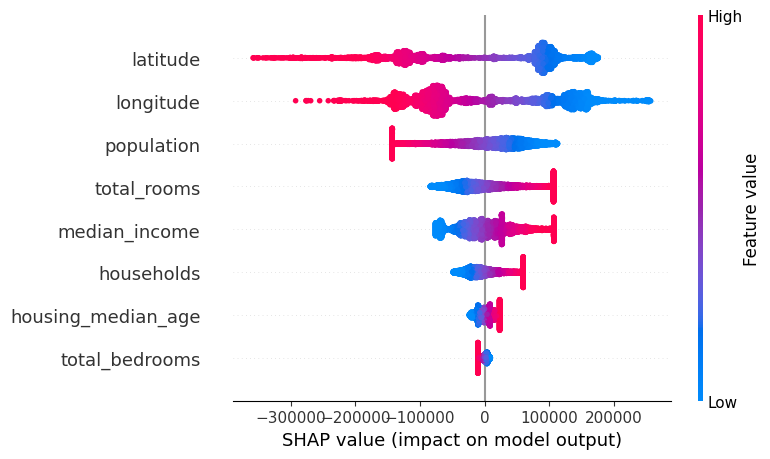

In [78]:
y = df2[["median_house_value"]]
x = df2.drop(["median_house_value", "ocean_proximity"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state=42)                 #Senaryo 3 : Linear Model

standart = StandardScaler()
x_train_scaler = standart.fit_transform(x_train)
x_test_scaler = standart.transform(x_test)

param_grid = {
    'fit_intercept': [True, False]
}

lr = LinearRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)

start_train_time = time.time()
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_linear = grid_search.best_estimator_

y_train_pred = best_linear.predict(x_train_scaler)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_linear.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print("---------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")
print("-----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

explainer = shap.LinearExplainer(best_linear, x_train_scaler)
shap_values = explainer(x_test_scaler)

shap.summary_plot(shap_values, x_test_scaler, feature_names=x.columns)

Train Time: 12.922892332077026
Train MSE: 4137662014.3848705
Train MAE: 45824.47278171284
Train MAPE: 0.2776686520468204
Train R2: 0.6773733186910547
---------------------------------------------
Test Time: 0.0012454986572265625
Test MSE: 4934653371.264518
Test MAE: 49850.283465765606
Test MAPE: 0.29817657882777854
Test R2: 0.6154665183525413
-----------------------------------------------
Best parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 3}


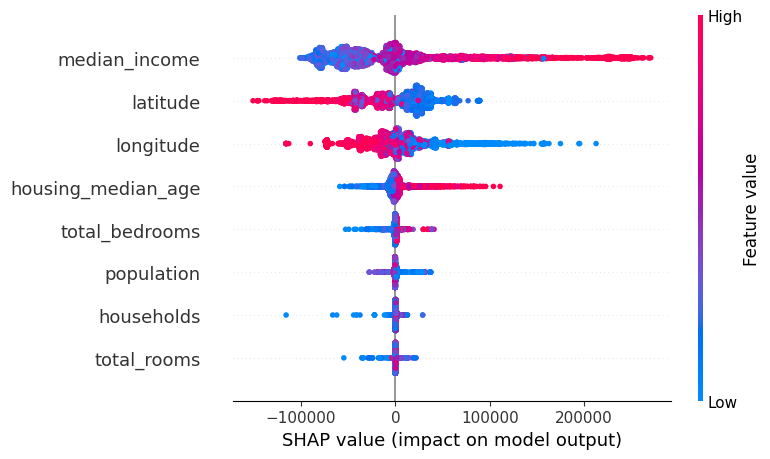

In [79]:
y = df2[["median_house_value"]]
x = df2.drop(["median_house_value", "ocean_proximity"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state=42)                 #Senaryo 3 : Decision Tree Regression

standart = StandardScaler()
x_train_scaler = standart.fit_transform(x_train)
x_test_scaler = standart.transform(x_test)

param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [3, 5, 8],
    'min_samples_leaf': [3, 5, 8]
}

dc = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dc, param_grid=param_grid, cv=5, n_jobs=-1)

start_train_time = time.time()
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_decision = grid_search.best_estimator_

y_train_pred = best_decision.predict(x_train_scaler)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_decision.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print("---------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")
print("-----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

explainer = shap.TreeExplainer(best_decision)
shap_values = explainer(x_test_scaler)

shap.summary_plot(shap_values, x_test_scaler, feature_names=x.columns)

Train Time: 118.66390633583069
Train MSE: 2470641177.4830303
Train MAE: 35204.09021000193
Train MAPE: 0.20782150428740231
Train R2: 0.8073562410304613
---------------------------------------------
Test Time: 0.0292508602142334
Test MSE: 3314737837.8695135
Test MAE: 39926.94179154021
Test MAPE: 0.2332769756339255
Test R2: 0.7416986390641038
-----------------------------------------------
Best parameters: {'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 50}


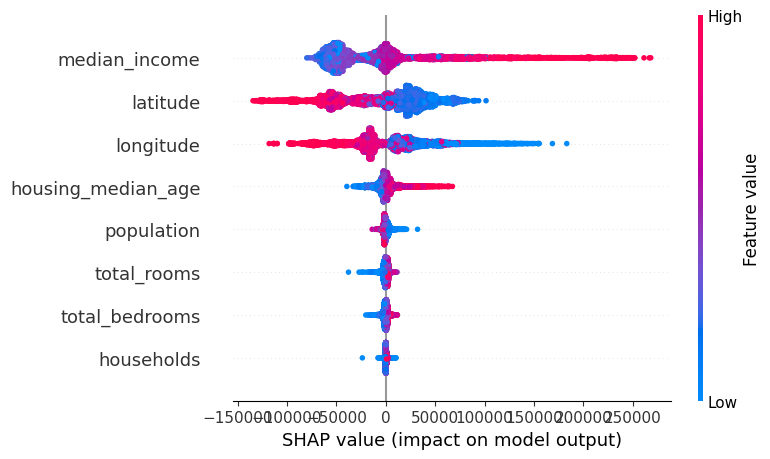

In [80]:
y = df2[["median_house_value"]]
x = df2.drop(["median_house_value", "ocean_proximity"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state=42)                 #Senaryo 3 : Random Forest Regression

standart = StandardScaler()
x_train_scaler = standart.fit_transform(x_train)
x_test_scaler = standart.transform(x_test)

param_grid = {
    'n_estimators' : [20, 50],
    'max_depth' : [4, 7, 9],
    'min_samples_split' : [5, 7, 10]
}

rm = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rm, param_grid=param_grid, cv=5, n_jobs=-1)

start_train_time = time.time()
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_random = grid_search.best_estimator_

y_train_pred = best_random.predict(x_train_scaler)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_random.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print("---------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")
print("-----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

explainer = shap.Explainer(best_random)
shap_values = explainer(x_test_scaler)

shap.summary_plot(shap_values, x_test_scaler, feature_names=x.columns)

# ***SENARYO 4 : EKSİK VERiLERİ ORTALAMA İLE DOLDURMA / STANDARDİZASYON YAPILMAYACAK / AYKIRI GÖZLEM ANALİZİ YAPILMAYACAK***


In [20]:
df3 = dfC.copy()

In [21]:
df3.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [22]:
df3['total_bedrooms'] = df3['total_bedrooms'].fillna(df3['total_bedrooms'].mean())

In [23]:
df3.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [46]:
df3.describe().T

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20640.0     537.870553     419.266592      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0   34992.764760   21115.101411      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                          25%        50%        75%        max  
longitude             -121.80    -118.49    -118.01    -114.31  
latitude                33.93      34.26      37.71      41.95  
housing_median_age      18.00      29.00      37.00      52.00  
total_rooms           1447.75    2127.00    3148.00   39320.00  
total_bedrooms         297.00     438.00     643.25    6445.00  
population             787.00    1166.00    1725.00   35682.00  
households             280.00     409.00     605.00    6082.00  
median_income        21865.75   32949.00   45539.00  150001.00  
median_house_value  119600.00  179700.00  264725.00  500001.00

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


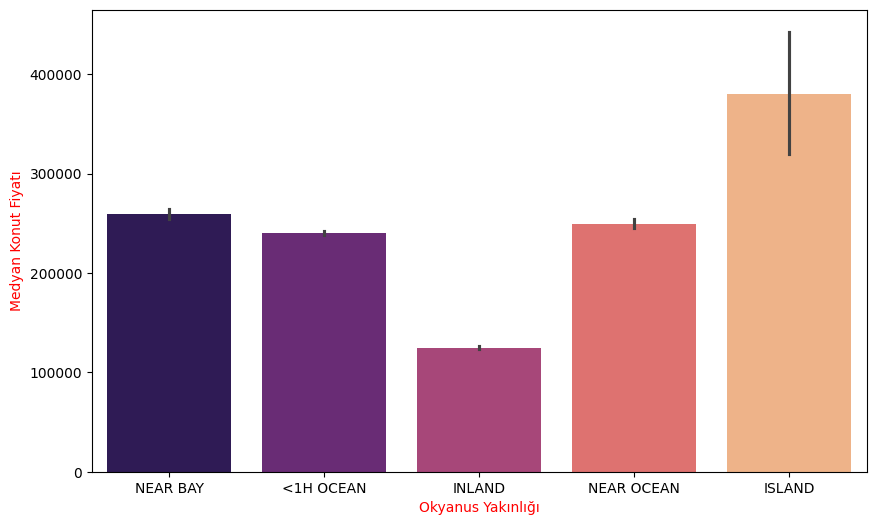

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='ocean_proximity', y='median_house_value', data=df3, palette='magma')
plt.xlabel("Okyanus Yakınlığı", color = "red")
plt.ylabel("Medyan Konut Fiyatı", color = "red")
plt.show()

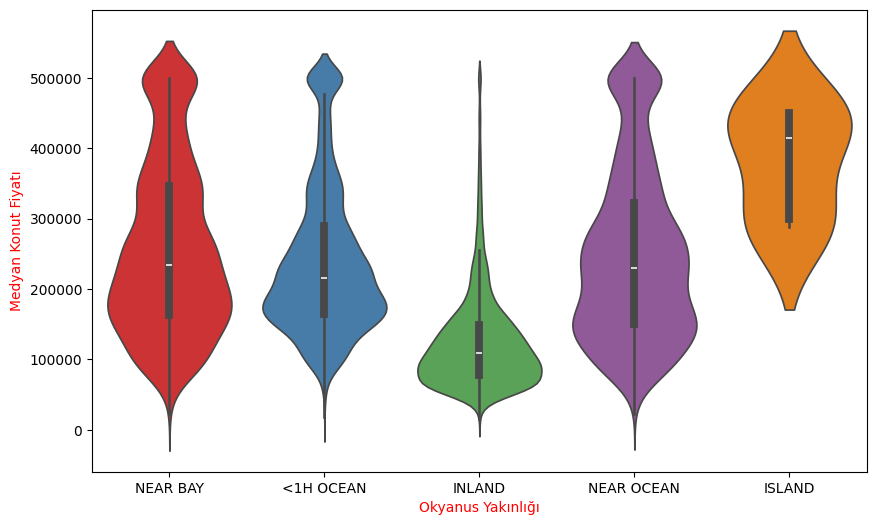

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ocean_proximity', y='median_house_value', data=df3, palette="Set1")
plt.xlabel("Okyanus Yakınlığı", color = "red")
plt.ylabel("Medyan Konut Fiyatı", color = "red")
plt.show()

In [29]:
correlation = df3.select_dtypes(include=[float, int])

In [33]:
corr1 = correlation.corr()

In [34]:
print(corr1)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.016047 -0.060119           -0.102912     0.169863   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069260    0.099773    0.055310      -0.016047   
latitude                 -0.066658   -0.108785   -0.071035      -0.060119   
housing_

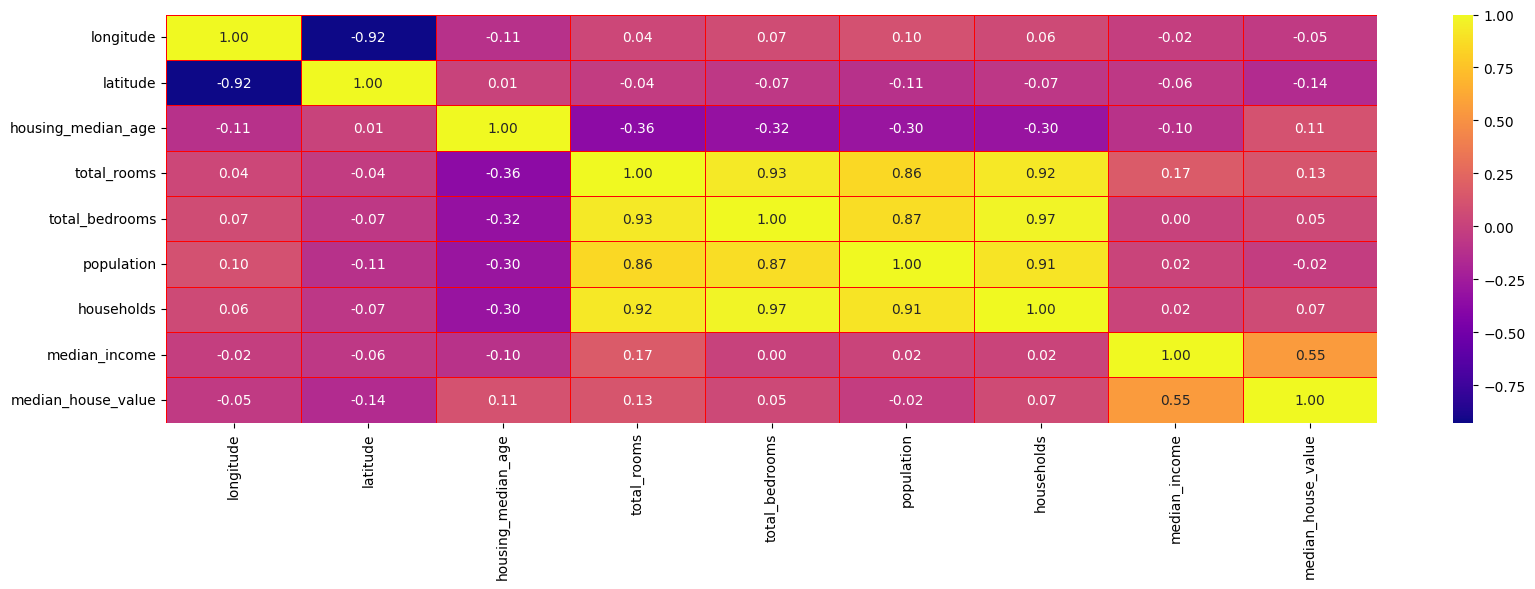

In [35]:
plt.figure(figsize=(17,6))
sns.heatmap(corr1, annot=True, cmap="plasma", fmt=".2f", linewidths=0.5, linecolor="red")
plt.tight_layout()
plt.show()

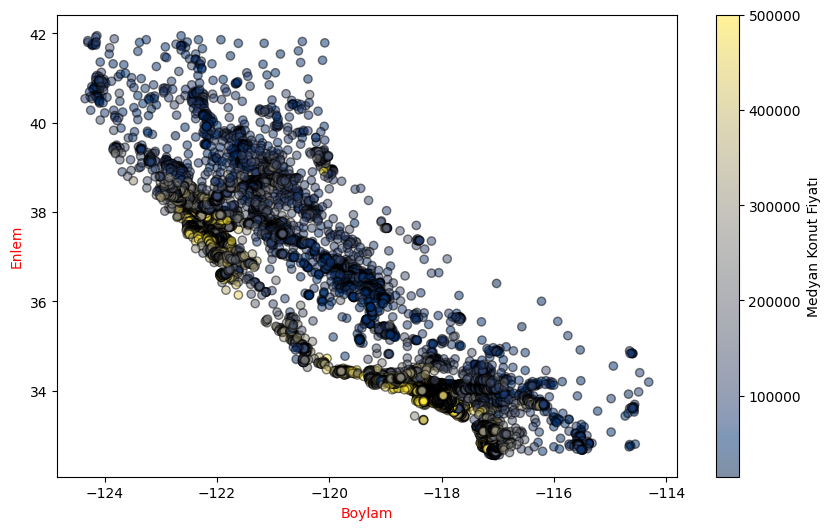

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df3['longitude'], df3['latitude'], c=df3['median_house_value'], cmap='cividis', marker='o', edgecolor='k', alpha=0.5)
plt.colorbar(label='Medyan Konut Fiyatı')
plt.xlabel('Boylam', color = "red")
plt.ylabel('Enlem', color = "red")
plt.show()

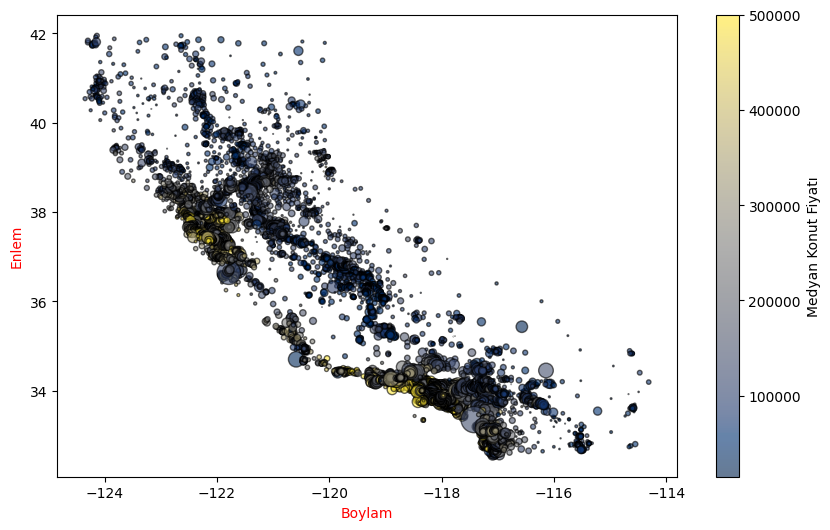

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df3['longitude'], df3['latitude'], s=df3['population']/100, c=df3['median_house_value'], cmap='cividis', marker='o', edgecolor='k', alpha=0.6)
plt.colorbar(label='Medyan Konut Fiyatı')
plt.xlabel('Boylam', color = "red")
plt.ylabel('Enlem', color = "red")
plt.show()

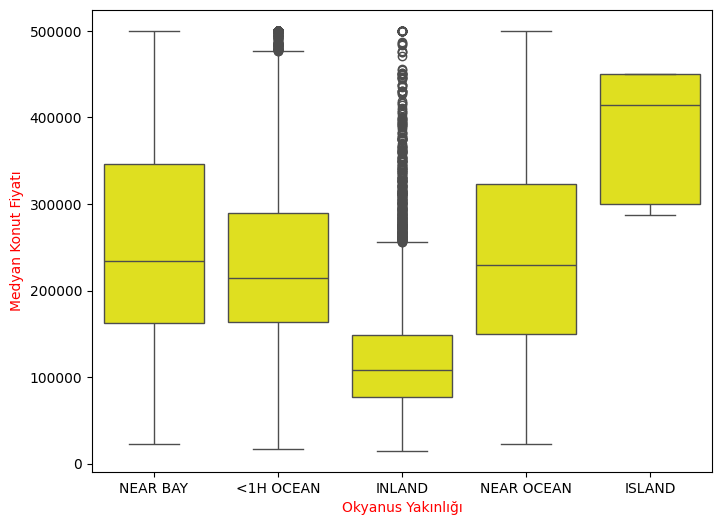

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df3, color = "yellow")
plt.xlabel("Okyanus Yakınlığı", color = "red")
plt.ylabel("Medyan Konut Fiyatı", color = "red")
plt.show()

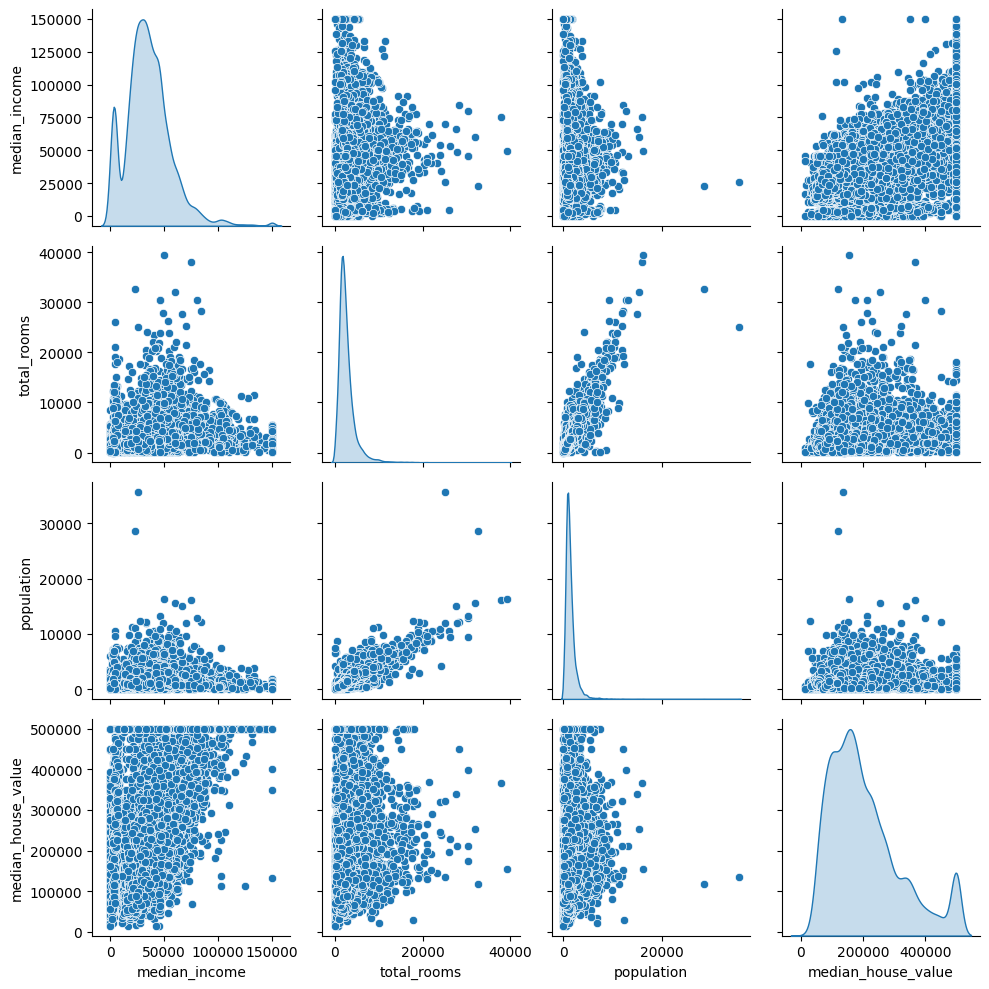

In [42]:
sns.pairplot(df3[['median_income', 'total_rooms', 'population', 'median_house_value']], diag_kind='kde')
plt.tight_layout()
plt.show()

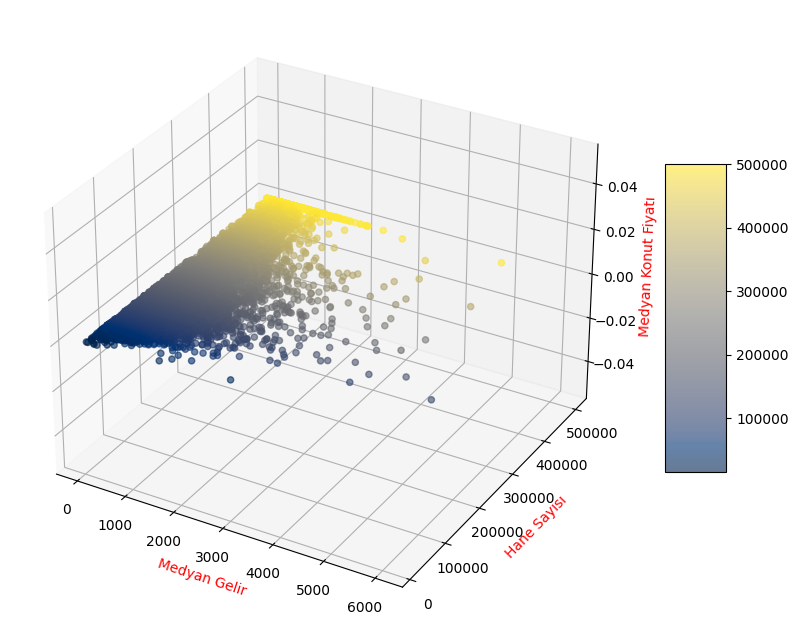

In [44]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df3['households'], df3['median_house_value'], c=df3['median_house_value'], cmap='cividis', alpha=0.6)
ax.set_xlabel('Medyan Gelir', color = "red")
ax.set_ylabel('Hane Sayısı', color = "red")
ax.set_zlabel('Medyan Konut Fiyatı', color = "red")
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
plt.show()                                     #hane sayısı ve konut fiyatı

In [ ]:
y = df3[["median_house_value"]]
x = df3.drop(["median_house_value", "ocean_proximity"], axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.70, random_state=42)

Train Time: 0.2634279727935791
Train MSE: 6488975820.821998
Train MAE: 60703.814090993015
Train MAPE: 0.37556017051002444
Train R2: 0.5156712733406423
---------------------------------------------
Test Time: 0.012558460235595703
Test MSE: 6432194192.488851
Test MAE: 60802.85416138334
Test MAPE: 0.37971926947540585
Test R2: 0.5098648962045189
-----------------------------------------------
Best parameters: {'fit_intercept': True}


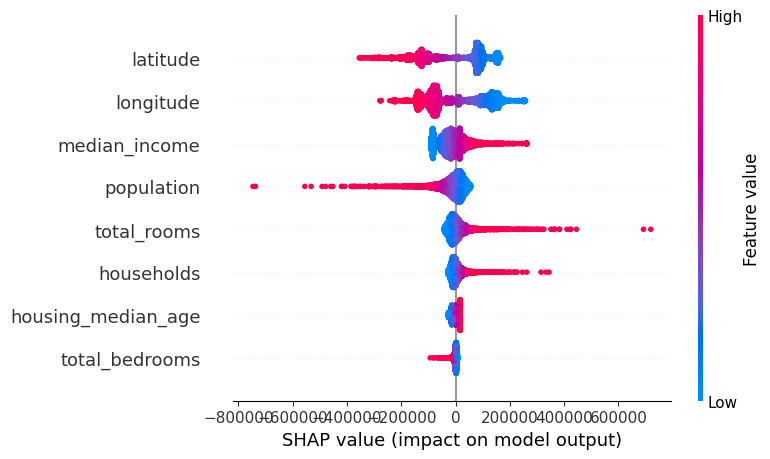

In [ ]:
param_grid = {
    'fit_intercept': [True, False]
}
                                                                                              #Senaryo 4 : Linear Regression
lr = LinearRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)
start_train_time = time.time()
grid_search.fit(x_train, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_linear = grid_search.best_estimator_

y_train_pred = best_linear.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train,y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_linear.predict(x_test)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print("---------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")
print("-----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

explainer = shap.Explainer(best_linear, x_train)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)

Train Time: 5.63365912437439
Train MSE: 4446318268.539826
Train MAE: 46986.019255979685
Train MAPE: 0.2781682009335837
Train R2: 0.6681325798111326
---------------------------------------------
Test Time: 0.0019567012786865234
Test MSE: 5241133028.289808
Test MAE: 50489.23142262302
Test MAPE: 0.299413308391253
Test R2: 0.6006241099146974
-----------------------------------------------
Best parameters: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 5}


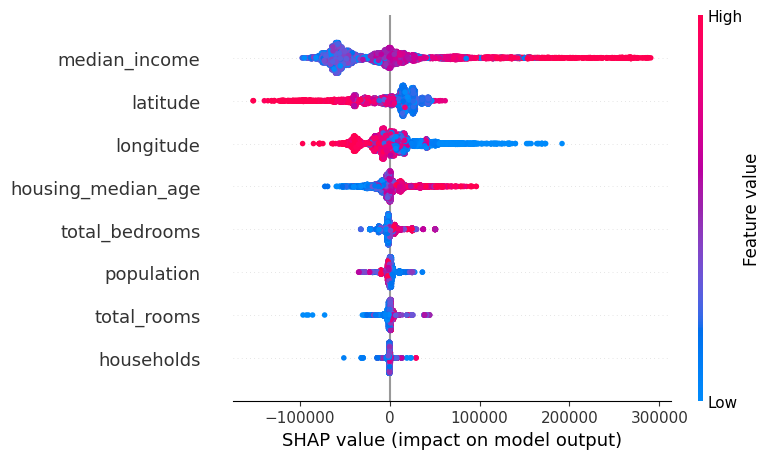

In [ ]:
param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [3, 5, 8],
    'min_samples_leaf': [3, 5, 8]
}
                                                                                              #Senaryo 4 : Decision Tree Regression
dc = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dc, param_grid=param_grid, cv=5, n_jobs=-1)
start_train_time = time.time()
grid_search.fit(x_train, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_decision= grid_search.best_estimator_

y_train_pred = best_decision.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train,y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_decision.predict(x_test)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print("---------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")
print("-----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

explainer = shap.TreeExplainer(best_decision)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)

Train Time: 127.10026669502258
Train MSE: 2657144002.754286
Train MAE: 36314.40965091813
Train MAPE: 0.2151364614897303
Train R2: 0.8016742230299282
---------------------------------------------
Test Time: 0.036923885345458984
Test MSE: 3595804237.664125
Test MAE: 41185.97956933014
Test MAPE: 0.24092053250188825
Test R2: 0.7259986513911845
-----------------------------------------------
Best parameters: {'max_depth': 9, 'min_samples_split': 7, 'n_estimators': 50}


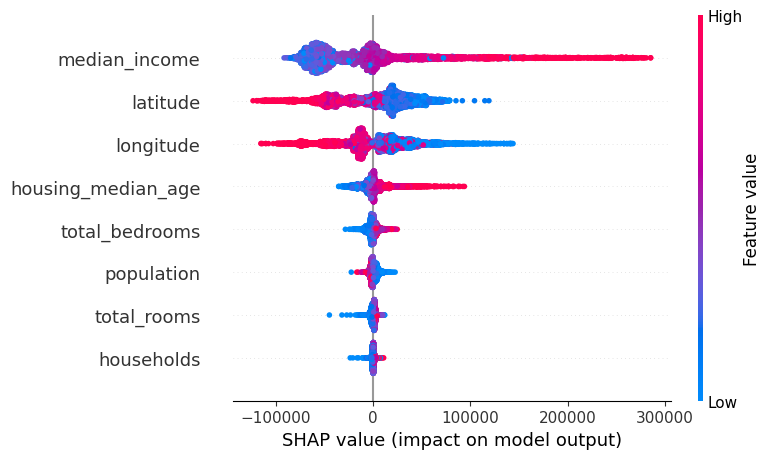

In [ ]:
param_grid = {
    'n_estimators' : [20, 50],
    'max_depth' : [4, 7, 9],
    'min_samples_split' : [5, 7, 10]
}
                                                                                              #Senaryo 4 : Random Forest Regression
rm = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rm, param_grid=param_grid, cv=5, n_jobs=-1)
start_train_time = time.time()
grid_search.fit(x_train, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_random= grid_search.best_estimator_

y_train_pred = best_random.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train,y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_random.predict(x_test)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print("---------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")
print("-----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

explainer = shap.Explainer(best_random)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)

# ***SENARYO 5 : EKSİK VERiLERİ ORTALAMA İLE DOLDURMA / STANDARDİZASYON YAPILACAK / AYKIRI GÖZLEM ANALİZİ YAPILMAYACAK***

In [ ]:
df4 = dfC.copy()

In [ ]:
df4.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [ ]:
df4['total_bedrooms'] = df4['total_bedrooms'].fillna(df4['total_bedrooms'].mean())

In [ ]:
df4.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [ ]:
stantdart = StandardScaler()

In [ ]:
x_train_scaler = standart.fit_transform(x_train)
x_test_scaler = standart.transform(x_test)

Train Time: 0.22583937644958496
Train MSE: 4531542595.996734
Train MAE: 51560.3280763728
Train MAPE: 0.34981609806077263
Train R2: 0.48288166247632314
---------------------------------------------
Test Time: 0.0020782947540283203
Test MSE: 4657351750.983576
Test MAE: 52251.77644403797
Test MAPE: 0.3508926343032978
Test R2: 0.48740217259680074
-----------------------------------------------
Best parameters: {'fit_intercept': True}


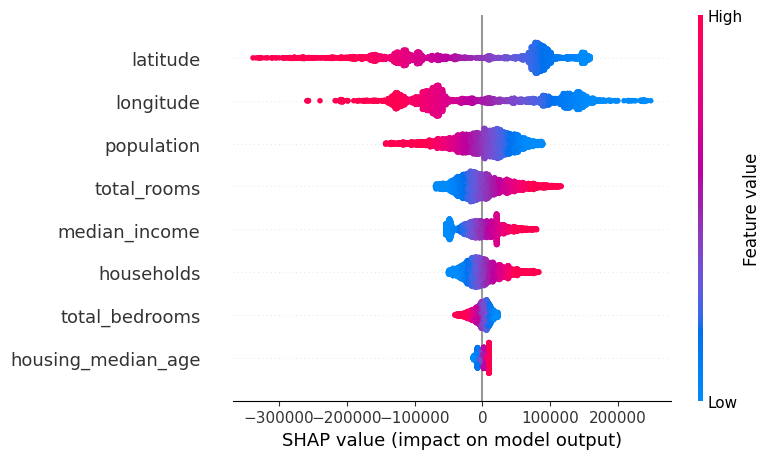

In [ ]:
param_grid = {
    'fit_intercept': [True, False]
}
                                                                                              #Senaryo 5 : Linear Regression
lr = LinearRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)
start_train_time = time.time()
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_linear = grid_search.best_estimator_

y_train_pred = best_linear.predict(x_train_scaler)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train,y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_linear.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print("---------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")
print("-----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

explainer = shap.LinearExplainer(best_linear, x_train_scaler)
shap_values = explainer(x_test_scaler)
shap.summary_plot(shap_values, x_test_scaler, feature_names=x_test.columns)

Train Time : 5.990399599075317
Train MSE : 2774985015.399211
Train MAE : 38030.6550195263
Train MAPE : 0.23808362888267878
Train R2 : 0.6833317557063102
-----------------------------------
Test Time : 0.0016269683837890625
Test MSE : 3385628276.4918237
Test MAE : 42324.163524015894
Test MAPE : 0.2637894229836627
Test R2 : 0.6273707051312932
-------------------------------------
Best Parametre : {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 5}


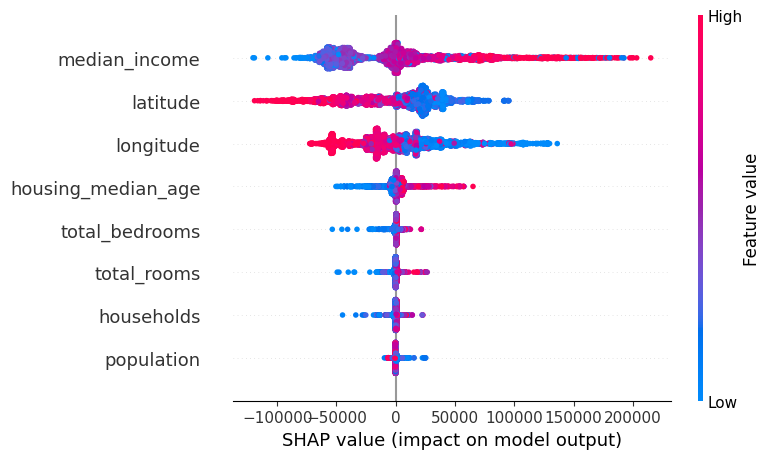

In [ ]:
param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [3, 5, 8],
    'min_samples_leaf': [3, 5, 8]
}
                                                                                                      #Senaryo 5 : Decision Tree Regression
dc = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dc, param_grid = param_grid, cv= 5, n_jobs= -1)
start_train_time = time.time()
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_decision = grid_search.best_estimator_

y_train_pred = best_decision.predict(x_train_scaler)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_decision.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time : {total_train_time}")
print(f"Train MSE : {train_mse}")
print(f"Train MAE : {train_mae}")
print(f"Train MAPE : {train_mape}")
print(f"Train R2 : {train_r2}")
print("-----------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test MSE : {test_mse}")
print(f"Test MAE : {test_mae}")
print(f"Test MAPE : {test_mape}")
print(f"Test R2 : {test_r2}")
print("-------------------------------------")
print(f"Best Parametre : {grid_search.best_params_}")


explainer = shap.TreeExplainer(best_decision)
shap_values = explainer.shap_values(x_test_scaler)
shap.summary_plot(shap_values, x_test_scaler, feature_names=x_test.columns)

Train Time : 107.32988548278809
Train MSE : 1834883032.5348027
Train MAE : 31003.24550954256
Train MAPE : 0.19588389542237772
Train R2 : 0.7906117744158387
-------------------------------------------
Test Time : 0.03511190414428711
Test MSE : 2555933843.0323606
Test MAE : 36409.18773258628
Test MAPE : 0.22700437858195557
Test R2 : 0.7186886013821038
---------------------------------------------
Best Parametre : {'max_depth': 9, 'min_samples_split': 7, 'n_estimators': 50}


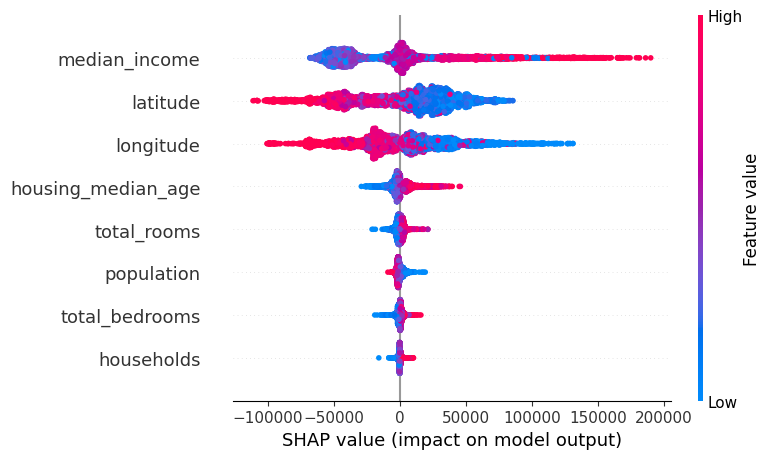

In [ ]:
param_grid = {
    'n_estimators' : [20, 50],
    'max_depth' : [4, 7, 9],
    'min_samples_split' : [5, 7, 10]
}                                                                                                   #Senaryo 5 : Random Forest Regressor

rm = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rm, param_grid=param_grid, cv = 5, n_jobs=-1)
start_train_time = time.time()
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_random = grid_search.best_estimator_

y_train_pred = best_random.predict(x_train_scaler)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_random.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time : {total_train_time}")
print(f"Train MSE : {train_mse}")
print(f"Train MAE : {train_mae}")
print(f"Train MAPE : {train_mape}")
print(f"Train R2 : {train_r2}")
print("-------------------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test MSE : {test_mse}")
print(f"Test MAE : {test_mae}")
print(f"Test MAPE : {test_mape}")
print(f"Test R2 : {test_r2}")
print("---------------------------------------------")
print(f"Best Parametre : {grid_search.best_params_}")

explainer = shap.Explainer(best_random)
shap_values = explainer(x_test_scaler)
shap.summary_plot(shap_values, x_test_scaler, feature_names=x_test.columns)

# ***SENARYO 6 : EKSİK VERiLERİ ORTALAMA İLE DOLDURMA / STANDARDİZASYON YAPILACAK / AYKIRI GÖZLEM ANALİZİNİN BASKILAMA YÖNTEMİ İLE DOLDURULMASI***

In [61]:
df5 = dfC.copy()

In [62]:
df5.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [63]:
df5['total_bedrooms'] = df5['total_bedrooms'].fillna(df5['total_bedrooms'].mean())

In [64]:
numeric_columns = df5.select_dtypes(include=[np.number])

q1 = numeric_columns.quantile(0.25)
q3 = numeric_columns.quantile(0.75)
IQR = q3 - q1                                                            #aykırı değerleri baskılama yöntemi ile dolduruldu

alt_sinir = q1 - 1.5 * IQR
ust_sinir = q3 + 1.5 * IQR

for column in numeric_columns.columns:
    df5[column] = np.where(df5[column] < alt_sinir[column], alt_sinir[column], df5[column])
    df5[column] = np.where(df5[column] > ust_sinir[column], ust_sinir[column], df5[column])

print("Aykırı değerler baskılama yöntemi ile sınırlandırıldıktan sonra kalan veri seti boyutu: ", df5.shape)

Aykırı değerler baskılama yöntemi ile sınırlandırıldıktan sonra kalan veri seti boyutu:  (20640, 10)


Train Time: 2.702822685241699
Train MSE: 6101119403.769285
Train MAE: 59930.67858473347
Train MAPE: 0.3709747003039427
Train R2: 0.5265599756391715
---------------------------------------------
Test Time: 0.006299257278442383
Test MSE: 6082436439.767465
Test MAE: 59873.13989809917
Test MAPE: 0.37453926378478236
Test R2: 0.5194035338311735
-----------------------------------------------
Best parameters: {'fit_intercept': True}


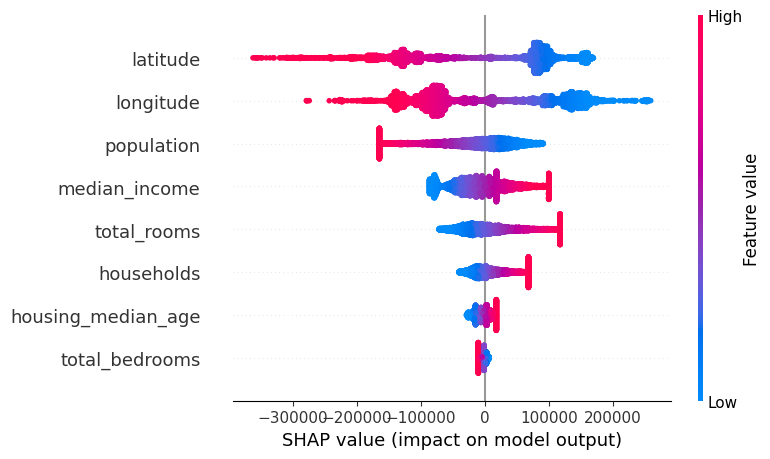

In [65]:
y = df5[["median_house_value"]]
x = df5.drop(["median_house_value", "ocean_proximity"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=42)

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)                                                                #Senaryo 6 : Linear Regression

param_grid = {
    'fit_intercept': [True, False]
}

lr = LinearRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)

start_train_time = time.time()
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_linear = grid_search.best_estimator_

y_train_pred = best_linear.predict(x_train_scaler)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_linear.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print("---------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")
print("-----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")


explainer = shap.LinearExplainer(best_linear, x_train_scaler)
shap_values = explainer(x_test_scaler)
shap.summary_plot(shap_values, x_test_scaler, feature_names=x.columns)

Train Time: 9.598327159881592
Train MSE: 3758812751.737512
Train MAE: 43164.77137936689
Train MAPE: 0.2507653771063481
Train R2: 0.7083203453367956
---------------------------------------------
Test Time: 0.0014233589172363281
Test MSE: 4398302477.907555
Test MAE: 46422.56502279203
Test MAPE: 0.2680333327145239
Test R2: 0.6524733716568396
-----------------------------------------------
Best parameters: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 5}


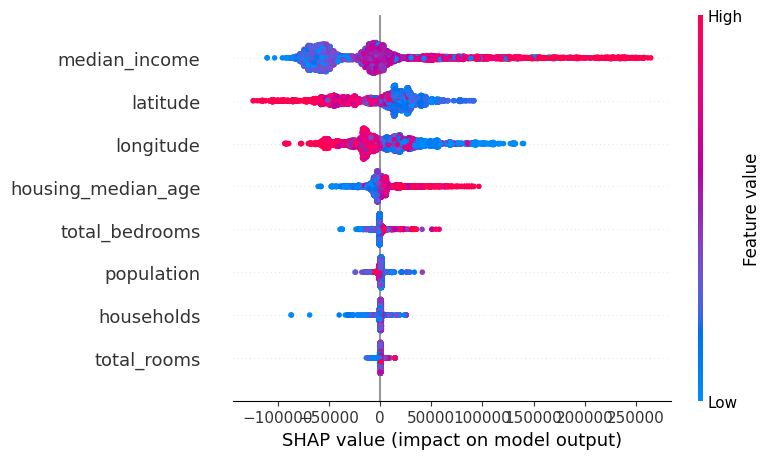

In [66]:
y = df5[["median_house_value"]]
x = df5.drop(["median_house_value", "ocean_proximity"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state=42)                 #Senaryo 6 : Decision Tree Regression

standart = StandardScaler()
x_train_scaler = standart.fit_transform(x_train)
x_test_scaler = standart.transform(x_test)

param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [3, 5, 8],
    'min_samples_leaf': [3, 5, 8]
}

dc = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dc, param_grid=param_grid, cv=5, n_jobs=-1)

start_train_time = time.time()
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_decision = grid_search.best_estimator_

y_train_pred = best_decision.predict(x_train_scaler)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_decision.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print("---------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")
print("-----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

explainer = shap.TreeExplainer(best_decision)
shap_values = explainer(x_test_scaler)
shap.summary_plot(shap_values, x_test_scaler, feature_names=x.columns)

Train Time: 128.72377681732178
Train MSE: 2511574985.7078958
Train MAE: 35777.45735717142
Train MAPE: 0.21245544514667558
Train R2: 0.805104597414865
---------------------------------------------
Test Time: 0.030387401580810547
Test MSE: 3415148892.435294
Test MAE: 40495.17151439127
Test MAPE: 0.23805100519895778
Test R2: 0.7301560804789056
-----------------------------------------------
Best parameters: {'max_depth': 9, 'min_samples_split': 7, 'n_estimators': 50}


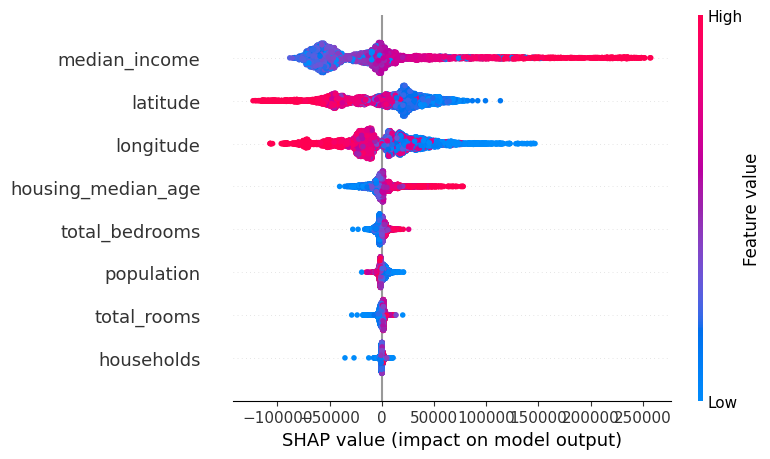

In [67]:
y = df5[["median_house_value"]]
x = df5.drop(["median_house_value", "ocean_proximity"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state=42)                 #Senaryo 6 : Random Forest Regression

standart = StandardScaler()
x_train_scaler = standart.fit_transform(x_train)
x_test_scaler = standart.transform(x_test)

param_grid = {
    'n_estimators' : [20, 50],
    'max_depth' : [4, 7, 9],
    'min_samples_split' : [5, 7, 10]
}

rm = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rm, param_grid=param_grid, cv=5, n_jobs=-1)

start_train_time = time.time()
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_random = grid_search.best_estimator_

y_train_pred = best_random.predict(x_train_scaler)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_random.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print("---------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")
print("-----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

explainer = shap.Explainer(best_random)
shap_values = explainer(x_test_scaler)

shap.summary_plot(shap_values, x_test_scaler, feature_names=x.columns)

# ***SENARYO 7 : VERİ SETİ SAYFAYA DAHİL EDİLDİKTEN SONRA KEŞİFSEL VERİ ANALİZİ HİÇ UYGULANMADAN MODELLEMEYE GEÇİLMESİ***

In [89]:
df7 = dfC.copy()

In [90]:
y = df7[["median_house_value"]]
x = df7.drop(["median_house_value", "ocean_proximity"], axis=1)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.70, random_state = 42)

In [92]:
param_grid = {
    'fit_intercept': [True, False]
}                                                                                                    #Senaryo 7 : Linear Regression


lr = LinearRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)

start_train_time = time.time()
grid_search.fit(x_train, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

best_linear = grid_search.best_estimator_

y_train_pred = best_linear.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_linear.predict(x_test)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print("---------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")
print("-----------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")


explainer = shap.LinearExplainer(best_linear, x_train_scaler)
shap_values = explainer(x_test_scaler)
shap.summary_plot(shap_values, x_test_scaler, feature_names=x.columns)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Burada keşifsel veri analizi yapılmadığından veri seti içinden boş değerin olduğunu bilemiyorum ve model boş değer olduğu için eğitimini tamamlayamıyor.